<a href="https://colab.research.google.com/github/pixelfreund/courses/blob/main/geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas matplotlib shapely

--2024-12-08 14:01:36--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.232.137, 52.92.225.193, 52.92.243.209, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.232.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.1’

ne_110m_admin_0_cou 100%[===================>] 209.94K   869KB/s    in 0.2s    

2024-12-08 14:01:37 (869 KB/s) - ‘ne_110m_admin_0_countries.zip.1’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
replace ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ne_110m_admin_0_countries.README.html  
replace ne_110m_admin_0_countries.VERSION.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countri

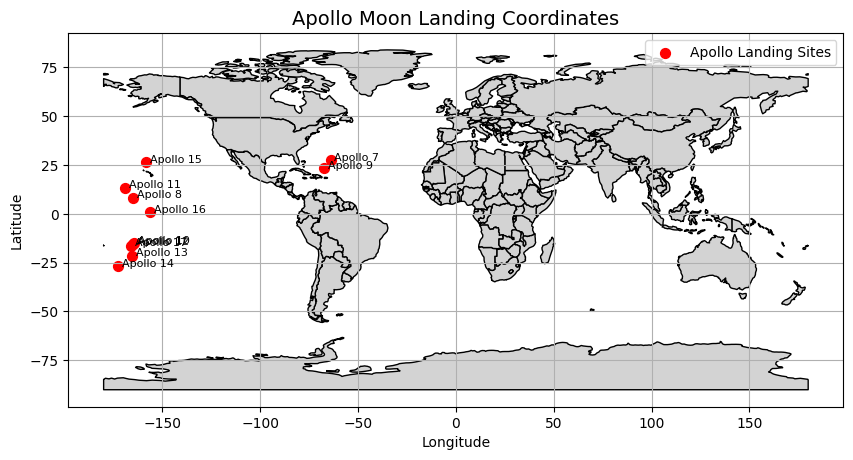

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create data for Apollo landing sites
landing_sites = {
    "Mission": ["Apollo 7", "Apollo 8", "Apollo 9", "Apollo 10", "Apollo 11", "Apollo 12", "Apollo 13", "Apollo 14", "Apollo 15", "Apollo 16", "Apollo 17"],
    "Latitude": [27.23, 8.10, 23.25, -15.25, 13.30, -15.78, -21.63, -27.02, 26.13, 0.70, -16.47],
    "Longitude": [-64.04, -165.00, -67.56, -164.55, -169.15, -165.15, -165.39, -172.65, -158.13, -156.23, -166.12],
}


# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(landing_sites["Longitude"], landing_sites["Latitude"])]
gdf = gpd.GeoDataFrame(landing_sites, geometry=geometry)

# Download the Natural Earth low-resolution world map data
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Load world map from the downloaded file
world = gpd.read_file("ne_110m_admin_0_countries.shp") # Load the world map from the shapefile

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=50, label='Apollo Landing Sites')

# Add labels to the points
for x, y, label in zip(landing_sites["Longitude"], landing_sites["Latitude"], landing_sites["Mission"]):
    plt.text(x + 2, y, label, fontsize=8)

# Customize the map
plt.title("Apollo Moon Landing Coordinates", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()